In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [62]:
crypto = 'BTC'
currency = "USD"

In [80]:
#start = dt.datetime(2012,1,1)
#end = dt.datetime.now()

start = dt.datetime(2014,1,1)
end = dt.datetime(2022,1,1)

data = yf.download(f"{crypto}-{currency}", start , end)

[*********************100%***********************]  1 of 1 completed


In [81]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299


In [82]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [83]:
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

In [67]:
import pickle as pkl

pkl.dump(scaler, open(f"{crypto}_scaler.pkl", "wb"))

In [84]:
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.68656304],
       [0.69744637],
       [0.68451128]])

In [85]:
prediction_days = 60

x_train = []
y_train = []

In [29]:
len(scaled_data)

1514

In [30]:
scaled_data[60 - 60:60,0]

array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05839797, 0.06268138, 0.06892405,
       0.08261865, 0.08079221, 0.0818612 , 0.08377014, 0.08219371,
       0.07259534, 0.07673914, 0.08084805, 0.08019425, 0.08070273,
       0.08162304, 0.08015872, 0.0728206 , 0.07405162, 0.07862523,
       0.08232062, 0.07559844, 0.09112687, 0.11995542, 0.1308138 ,
       0.12934354, 0.12693903, 0.12942667, 0.13445355, 0.15024744,
       0.15705359, 0.1554171 , 0.15583526, 0.12491102, 0.13432919,
       0.12899074, 0.14415345, 0.14584601, 0.1435206 , 0.13805948,
       0.14156408, 0.13387866, 0.14222845, 0.14559324, 0.16924134,
       0.18579795, 0.18964797, 0.193201  , 0.20249926, 0.22608115])

In [31]:
scaled_data[60, 0]

0.22509971578645008

In [86]:
for x in range(prediction_days, len(scaled_data)) :
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [87]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [34]:
x_train.shape

(1454, 60, 1)

In [89]:
model = tf.keras.models.Sequential()

In [90]:
model.add(tf.keras.layers.LSTM(units = 128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(units = 128, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(units = 128))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1))

In [91]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss="mean_absolute_error", metrics=["mae"])

In [92]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
82/82 [==============================] - 33s 261ms/step - loss: 0.0340 - mae: 0.0340
Epoch 2/25
82/82 [==============================] - 21s 255ms/step - loss: 0.0249 - mae: 0.0249
Epoch 3/25
82/82 [==============================] - 21s 255ms/step - loss: 0.0219 - mae: 0.0219
Epoch 4/25
82/82 [==============================] - 21s 255ms/step - loss: 0.0217 - mae: 0.0217
Epoch 5/25
82/82 [==============================] - 21s 253ms/step - loss: 0.0202 - mae: 0.0202
Epoch 6/25
82/82 [==============================] - 21s 257ms/step - loss: 0.0223 - mae: 0.0223
Epoch 7/25
82/82 [==============================] - 21s 259ms/step - loss: 0.0194 - mae: 0.0194
Epoch 8/25
82/82 [==============================] - 21s 260ms/step - loss: 0.0202 - mae: 0.0202
Epoch 9/25
82/82 [==============================] - 21s 261ms/step - loss: 0.0189 - mae: 0.0189
Epoch 10/25
82/82 [==============================] - 21s 261ms/step - loss: 0.0197 - mae: 0.0197
Epoch 11/25
82/82 [====================

In [110]:
test_start = dt.datetime(2022,1,1)
test_end = dt.datetime.now()

In [111]:
test_data = yf.download(f"{crypto}-{currency}", test_start , test_end)

[*********************100%***********************]  1 of 1 completed


In [112]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
...,...,...,...,...,...,...
2023-06-02,26824.556641,27303.861328,26574.644531,27249.589844,27249.589844,14837415000
2023-06-03,27252.324219,27317.052734,26958.003906,27075.128906,27075.128906,8385597470
2023-06-04,27075.123047,27407.019531,26968.224609,27119.066406,27119.066406,9360912318


In [113]:
actual_prices = test_data["Close"].values

In [114]:
total_dataset = pd.concat((data["Close"], test_data["Close"]), axis = 0)

In [115]:
total_dataset

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2023-06-02    27249.589844
2023-06-03    27075.128906
2023-06-04    27119.066406
2023-06-05    25760.097656
2023-06-06    27238.783203
Name: Close, Length: 3185, dtype: float64

In [116]:
len(total_dataset)

3185

In [117]:
len(test_data)

522

In [118]:
len(total_dataset)-len(test_data)-prediction_days

2603

In [119]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

In [120]:
model_inputs

array([63226.40234375, 62970.046875  , 61452.23046875, 61125.67578125,
       61527.48046875, 63326.98828125, 67566.828125  , 66971.828125  ,
       64995.23046875, 64949.9609375 , 64155.94140625, 64469.52734375,
       65466.83984375, 63557.87109375, 60161.24609375, 60368.01171875,
       56942.13671875, 58119.578125  , 59697.1953125 , 58730.4765625 ,
       56289.2890625 , 57569.07421875, 56280.42578125, 57274.6796875 ,
       53569.765625  , 54815.078125  , 57248.45703125, 57806.56640625,
       57005.42578125, 57229.828125  , 56477.81640625, 53598.24609375,
       49200.703125  , 49368.84765625, 50582.625     , 50700.0859375 ,
       50504.796875  , 47672.12109375, 47243.3046875 , 49362.5078125 ,
       50098.3359375 , 46737.48046875, 46612.6328125 , 48896.72265625,
       47665.42578125, 46202.14453125, 46848.77734375, 46707.015625  ,
       46880.27734375, 48936.61328125, 48628.51171875, 50784.5390625 ,
       50822.1953125 , 50429.859375  , 50809.515625  , 50640.41796875,
      

In [121]:
model_inputs.shape

(582,)

In [122]:
model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [123]:
x_test = []

for x in range(prediction_days, len(model_inputs)) :
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [124]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [125]:
x_test.shape

(522, 60, 1)

In [126]:
predicted_prices = model.predict(x_test)

17/17 [==============================] - 2s 90ms/step


In [127]:
predicted_prices = scaler.inverse_transform(predicted_prices)

In [128]:
predicted_prices.shape

(522, 1)

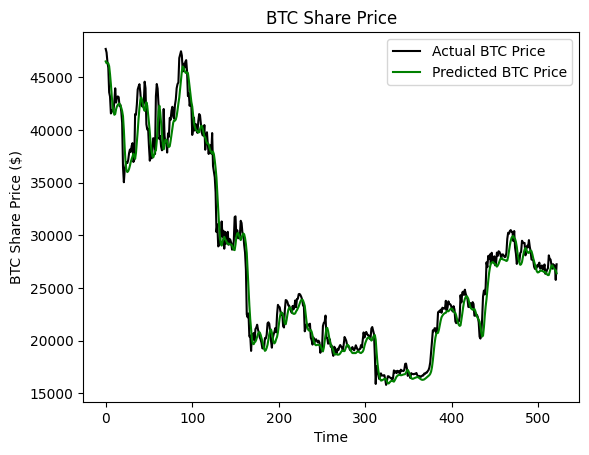

In [129]:
plt.plot(actual_prices, color="black", label=f"Actual {crypto} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {crypto} Price")
plt.title(f"{crypto} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{crypto} Share Price ($)")
plt.legend()
plt.show()

In [39]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [40]:
pred = model.predict(real_data)
pred = scaler.inverse_transform(pred)
pred

1/1 [==============================] - 3s 3s/step


array([[1889.1985]], dtype=float32)

In [78]:
new_df = data.filter(["Close"])

print(data.iloc[-1:])

last_60_days = new_df[-60:].values
last_60_days = scaler.transform(last_60_days)

x_pred_tomorrow = []
x_pred_tomorrow.append(last_60_days)
x_pred_tomorrow = np.array(x_pred_tomorrow)
x_pred_tomorrow = np.reshape(x_pred_tomorrow, (x_pred_tomorrow.shape[0], x_pred_tomorrow.shape[1], 1))

tomorrow_price = model.predict(x_pred_tomorrow)
tomorrow_price = scaler.inverse_transform(tomorrow_price)
print(tomorrow_price)

                    Open          High           Low         Close  \
Date                                                                 
2023-06-06  25732.109375  27313.820312  25434.867188  27238.783203   

               Adj Close       Volume  
Date                                   
2023-06-06  27238.783203  21929670693  
1/1 [==============================] - 2s 2s/step
[[25579.021]]


In [79]:
model.save(f"{crypto}_model.h5")